In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from tensorflow.keras.layers import Conv2D,MaxPooling2D
import os

print(tf.__version__)

2.0.0


In [2]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [3]:
num_classes = 5  # ['Angry','Happy','Neutral','Sad','Surprise'] 
img_rows,img_cols = 48,48
batch_size = 32

### Load the Data

Data source Link : https://drive.google.com/file/d/1n0UL67cessSqKWOcuesC2ClSLCVkwf9o/view?usp=sharing

In [4]:
train_data_dir = 'F:\\Emotion Dataset\\fer2013\\train'
validation_data_dir = 'F:\\Emotion Dataset\\fer2013\\validation'

### Split the data

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=30,shear_range=0.3,
                                   zoom_range=0.3,width_shift_range=0.4,
                                   height_shift_range=0.4,horizontal_flip=True,fill_mode='nearest')

In [6]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(train_data_dir,color_mode='grayscale',
                                                    target_size=(img_rows,img_cols),batch_size=batch_size,
                                                    class_mode='categorical',shuffle=True)

Found 24176 images belonging to 5 classes.


In [8]:
validation_generator = validation_datagen.flow_from_directory(validation_data_dir,color_mode='grayscale',
                                                    target_size=(img_rows,img_cols),batch_size=batch_size,
                                                    class_mode='categorical',shuffle=True)

Found 3006 images belonging to 5 classes.


### Build CNN model

In [9]:
model = Sequential()


model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

In [10]:
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

In [11]:
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

In [12]:
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

In [13]:
model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

In [14]:
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

In [15]:
model.add(Dense(num_classes,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

In [16]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0

### Save the Model

In [17]:
checkpoint = ModelCheckpoint('Emotion_model1.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

In [18]:
callbacks = [earlystop,checkpoint,reduce_lr]

### Compile the CNN Model

In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [20]:
nb_train_samples = 24176
nb_validation_samples = 3006
epochs=25

In [21]:
history=model.fit_generator(
                train_generator,
                steps_per_epoch=nb_train_samples//batch_size,
                epochs=epochs,
                callbacks=callbacks,
                validation_data=validation_generator,
                validation_steps=nb_validation_samples//batch_size)

Epoch 1/25
754/755 [============================>.] - ETA: 6s - loss: 1.8282 - accuracy: 0.2451 
Epoch 00001: val_loss improved from inf to 1.55999, saving model to Emotion_model1.h5
755/755 [==============================] - 4958s 7s/step - loss: 1.8280 - accuracy: 0.2450 - val_loss: 1.5600 - val_accuracy: 0.2903
Epoch 2/25
754/755 [============================>.] - ETA: 38s - loss: 1.5733 - accuracy: 0.2837 
Epoch 00002: val_loss improved from 1.55999 to 1.53648, saving model to Emotion_model1.h5
755/755 [==============================] - 29266s 39s/step - loss: 1.5732 - accuracy: 0.2838 - val_loss: 1.5365 - val_accuracy: 0.3088
Epoch 3/25
754/755 [============================>.] - ETA: 1s - loss: 1.5421 - accuracy: 0.3033
Epoch 00003: val_loss improved from 1.53648 to 1.51408, saving model to Emotion_model1.h5
755/755 [==============================] - 1244s 2s/step - loss: 1.5422 - accuracy: 0.3032 - val_loss: 1.5141 - val_accuracy: 0.3320
Epoch 4/25
754/755 [======================

### Plot the Train and Validation Accuracy_Loss

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
def plot_learningCurve(history):
  # Plot training & validation accuracy values
    epoch_range = range(1, 12)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

  # Plot training & validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

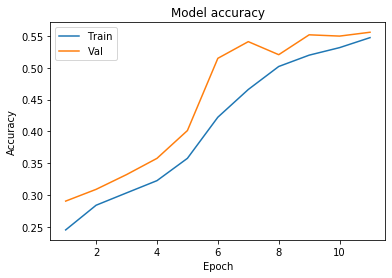

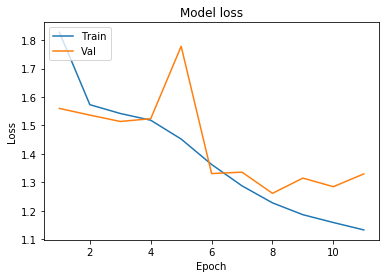

In [32]:
plot_learningCurve(history)